<a href="https://colab.research.google.com/github/haticetheengineer/FLO_CLTV_Prediction/blob/main/FLO_CLTV_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: how to mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pwd

/content


In [3]:
cd /content/drive/MyDrive/miuul_data_science_bootcamp/homeworks/CRM_Analytics/FLOCLTVPrediction/

/content/drive/MyDrive/miuul_data_science_bootcamp/homeworks/CRM_Analytics/FLOCLTVPrediction


In [4]:
!ls

FLO_CLTV_Prediction.ipynb  FLO_CLTV_Prediction_Proje.pdf  FLO_CLTV_Prediction.py  flo_data_20k.csv


In [13]:
!pip install plotly
!pip install Lifetimes

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from lifetimes import BetaGeoFitter
from lifetimes.fitters.gamma_gamma_fitter import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

# ---------------------- **TASKS** ------------------------


# **TASK 1: Data Preparation**
* 1. Read the `flo_data_20K.csv` file and create a copy of the DataFrame.
* 2. Define the functions `outlier_thresholds` and `replace_with_thresholds` that are necessary to suppress outliers.

    *Note: When calculating CLTV, frequency values must be integers. Therefore, round the lower and upper limits using `round()`.*
* 3. If there are outliers in the variables `"order_num_total_ever_online"`, `"order_num_total_ever_offline"`, `"customer_value_total_ever_offline"`, and `"customer_value_total_ever_online"`, suppress them.
* 4. Omnichannel means that customers shop from both online and offline platforms. Create new variables for each customer to represent their total number of purchases and total expenditures.
* 5. Examine the data types of the variables. Convert variables representing dates to the `date` type.


In [15]:
df_ = pd.read_csv("flo_data_20k.csv")
df = df_.copy()
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


In [20]:
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12'],
      dtype='object')

In [21]:
df.dtypes

,0
master_id,object
order_channel,object
last_order_channel,object
first_order_date,object
last_order_date,object
last_order_date_online,object
last_order_date_offline,object
order_num_total_ever_online,float64
order_num_total_ever_offline,float64
customer_value_total_ever_offline,float64


In [24]:
df.isnull().sum()

,0
master_id,0
order_channel,0
last_order_channel,0
first_order_date,0
last_order_date,0
last_order_date_online,0
last_order_date_offline,0
order_num_total_ever_online,0
order_num_total_ever_offline,0
customer_value_total_ever_offline,0


In [25]:
df.shape

(19945, 12)

**Task 1.2: Define the Functions for Handling Outliers**
* Define the `outlier_thresholds` and `replace_with_thresholds` functions necessary for suppressing outliers.

    *Note: When calculating CLTV, frequency values must be integers. Therefore, round the lower and upper limits using `round()`.*


In [34]:
def outlier_thresholds(dataframe, variable, q1=0.01, q3=0.99):
    """
    Determines the lower and upper limits for outliers based on the IQR method.

    Parameters:
    - dataframe: The dataset (DataFrame)
    - variable: The column/variable name
    - q1: The first quartile percentage (default: 25%)
    - q3: The third quartile percentage (default: 75%)

    Returns:
    - lower_limit: The lower threshold for outliers
    - upper_limit: The upper threshold for outliers
    """

    quartile1 = dataframe[variable].quantile(q1)
    quartile3 = dataframe[variable].quantile(q3)
    interquartile_range = quartile3 - quartile1
    lower_limit = quartile1 - 1.5 * interquartile_range
    upper_limit = quartile3 + 1.5 * interquartile_range
    return lower_limit, upper_limit


In [35]:
def replace_with_thresholds(dataframe, variable):
    """
    Replaces outliers with the lower and upper limits.

    Parameters:
    - dataframe: The dataset (DataFrame)
    - variable: The column/variable name
    """
    lower_limit, upper_limit = outlier_thresholds(dataframe, variable)

    # Outlier Suppression (Replacing with Lower and Upper Limits)

    dataframe.loc[dataframe[variable] < lower_limit, variable] = round(lower_limit, 0)
    dataframe.loc[dataframe[variable] > upper_limit, variable] = round(upper_limit, 0)

 **Task 1.3: Suppress Outliers in Specific Variables**
* Suppress outliers in the following variables if they exist: `"order_num_total_ever_online"`, `"order_num_total_ever_offline"`, `"customer_value_total_ever_offline"`, and `"customer_value_total_ever_online"`.


In [38]:
# Suppresss outliers
cols = ["order_num_total_ever_online", "order_num_total_ever_offline", "customer_value_total_ever_offline","customer_value_total_ever_online"]
for col in cols:
  replace_with_thresholds(df, col)
  print("For ", col, ", outliers are suppressed\n")

print("After suppressing the outliers:")
print(df)


for  order_num_total_ever_online , outliers are surpassed

for  order_num_total_ever_offline , outliers are surpassed

for  customer_value_total_ever_offline , outliers are surpassed

for  customer_value_total_ever_online , outliers are surpassed

Aykırı değerler baskılandıktan sonra:
                                  master_id order_channel last_order_channel  \
0      cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline   
1      f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile   
2      69b69676-1a40-11ea-941b-000d3a38a36f   Android App        Android App   
3      1854e56c-491f-11eb-806e-000d3a38a36f   Android App        Android App   
4      d6ea1074-f1f5-11e9-9346-000d3a38a36f       Desktop            Desktop   
...                                     ...           ...                ...   
19940  727e2b6e-ddd4-11e9-a848-000d3a38a36f   Android App            Offline   
19941  25cd53d4-61bf-11ea-8dd8-000d3a38a36f       Desktop            Deskt

**Task 1.4: Creating New Variables for Omnichannel Customers**
* Omnichannel customers shop from both online and offline platforms. Create new variables to represent each customer's total number of purchases and total expenditure.


In [39]:
df["num_of_total_order"] = df["order_num_total_ever_offline"] + df["order_num_total_ever_online"]
df["num_of_total_ever"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,num_of_total_order,num_of_total_ever
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98


Görev 1.5: Değişken tiplerini inceleyiniz. Tarih ifade eden değişkenlerin tipini date'e çeviriniz.

In [31]:
date_col = df.columns[df.columns.str.contains("date")]
date_col

Index(['first_order_date', 'last_order_date', 'last_order_date_online',
       'last_order_date_offline'],
      dtype='object')

In [32]:
df[date_col] = df[date_col].apply(pd.to_datetime)

In [33]:
df.dtypes

,0
master_id,object
order_channel,object
last_order_channel,object
first_order_date,datetime64[ns]
last_order_date,datetime64[ns]
last_order_date_online,datetime64[ns]
last_order_date_offline,datetime64[ns]
order_num_total_ever_online,float64
order_num_total_ever_offline,float64
customer_value_total_ever_offline,float64


#  **TASK 2: Creating the CLTV Data Structure**
* 1. Take the date two days after the most recent purchase in the dataset as the analysis date.
* 2. Create a new CLTV DataFrame containing `customer_id`, `recency_cltv_weekly`, `tenure_weekly`, `frequency`, and `monetary_cltv_avg` values.
   * The `monetary` value should represent the average value per purchase, and the `recency` and `tenure` values should be expressed in weekly terms. Prepare the data accordingly.


In [43]:
df['last_order_date'].max() #Timestamp('2021-05-30 00:00:00')

Timestamp('2021-05-30 00:00:00')

In [42]:
analysis_date = dt.datetime(2021,6,1)
print("analysis date : ", analysis_date)
print("type of analysis date : ", type(analysis_date))

analysis date :  2021-06-01 00:00:00
type of analysis date :  <class 'datetime.datetime'>


In [45]:
#########################
# Preparing the CLTV Data Structure
#########################

# recency: Time elapsed since the last purchase. Weekly. (per user)
# Tenure (T): Age of the customer. Weekly. (How long ago the first purchase was made relative to the analysis date)
# frequency: Total number of repeat purchases (frequency > 1)
# monetary: Average gain per purchase

cltv_df = pd.DataFrame()
cltv_df['customer_id'] = df['master_id']

cltv_df['recency'] = (df['last_order_date']-df['first_order_date']).dt.days
cltv_df['tenure'] = (analysis_date - df['first_order_date']).dt.days
cltv_df['frequency'] = df['num_of_total_order']
cltv_df['monetary'] = df['num_of_total_ever']

cltv_df.head()

,customer_id,recency,tenure,frequency,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,119,214,5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,1469,1574,21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,366,552,5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,11,146,2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,582,668,2.0,209.98


In [46]:
cltv_df["monetary_cltv_avg"] = cltv_df["monetary"] / cltv_df["frequency"]

cltv_df["recency_cltv_weekly"] = cltv_df["recency"] / 7

cltv_df["tenure_weekly"] = cltv_df["tenure"] / 7

cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

cltv_df.head()

,customer_id,recency,tenure,frequency,monetary,monetary_cltv_avg,recency_cltv_weekly,tenure_weekly
0,cc294636-19f0-11eb-8d74-000d3a38a36f,119,214,5.0,939.37,187.874000,17.000000,30.571429
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,1469,1574,21.0,2013.55,95.883333,209.857143,224.857143
2,69b69676-1a40-11ea-941b-000d3a38a36f,366,552,5.0,585.32,117.064000,52.285714,78.857143
3,1854e56c-491f-11eb-806e-000d3a38a36f,11,146,2.0,121.97,60.985000,1.571429,20.857143
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,582,668,2.0,209.98,104.990000,83.142857,95.428571


In [50]:
cltv_df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,19945.0,666.844472,522.126125,0.000000,353.000000,536.000000,766.000000,3034.000000
tenure,19945.0,801.302833,523.396883,5.000000,517.000000,651.000000,836.000000,3060.000000
frequency,19945.0,4.978140,4.120919,2.000000,3.000000,4.000000,6.000000,57.000000
monetary,19945.0,741.626996,687.905657,44.980000,339.980000,545.270000,897.780000,9063.760000
monetary_cltv_avg,19945.0,152.099009,73.524091,22.490000,103.653333,136.906154,182.450000,1401.800000
recency_cltv_weekly,19945.0,95.263496,74.589446,0.000000,50.428571,76.571429,109.428571,433.428571
tenure_weekly,19945.0,114.471833,74.770983,0.714286,73.857143,93.000000,119.428571,437.142857


In [51]:
cltv_df.shape

(19945, 8)

# **TASK 3: BG/NBD, Gamma-Gamma Model Fitting, CLTV Calculation**
* 1. Fit the BG/NBD model.
  * a. Predict the expected purchases from customers over 3 months and add it to the CLTV DataFrame as `exp_sales_3_month`.
  * b. Predict the expected purchases from customers over 6 months and add it to the CLTV DataFrame as `exp_sales_6_month`.
* 2. Fit the Gamma-Gamma model. Estimate the average value that customers will leave and add it to the CLTV DataFrame as `exp_average_value`.
* 3. Calculate the 6-month CLTV and add it to the DataFrame as `cltv`.
  * a. Observe the top 20 customers with the highest CLTV values.


In [52]:
##################################
# Building the BG-NBD Model
##################################


bgf = BetaGeoFitter(penalizer_coef=0.001)

bgf.fit(cltv_df['frequency'],
        cltv_df['recency_cltv_weekly'],
        cltv_df['tenure_weekly'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<lifetimes.BetaGeoFitter: fitted with 19945 subjects, a: 0.00, alpha: 76.17, b: 0.00, r: 3.66>

In [53]:
# a. Predict the expected purchases from customers over 3 months
# and add it to the CLTV DataFrame as `exp_sales_3_month`.

cltv_df["exp_sales_3_month"] = bgf.predict(4 * 3,
                                          cltv_df['frequency'],
                                          cltv_df['recency_cltv_weekly'],
                                          cltv_df['tenure_weekly'])

In [54]:
# Predict the expected purchases from customers over 6 months
# and add it to the CLTV DataFrame as `exp_sales_6_month`.

cltv_df["exp_sales_6_month"] = bgf.predict(4 * 6,
                                          cltv_df['frequency'],
                                          cltv_df['recency_cltv_weekly'],
                                          cltv_df['tenure_weekly'])

In [55]:
cltv_df.head()

,customer_id,recency,tenure,frequency,monetary,monetary_cltv_avg,recency_cltv_weekly,tenure_weekly,exp_sales_3_month,exp_sales_6_month
0,cc294636-19f0-11eb-8d74-000d3a38a36f,119,214,5.0,939.37,187.874000,17.000000,30.571429,0.973927,1.947853
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,1469,1574,21.0,2013.55,95.883333,209.857143,224.857143,0.983161,1.966323
2,69b69676-1a40-11ea-941b-000d3a38a36f,366,552,5.0,585.32,117.064000,52.285714,78.857143,0.670586,1.341172
3,1854e56c-491f-11eb-806e-000d3a38a36f,11,146,2.0,121.97,60.985000,1.571429,20.857143,0.700412,1.400824
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,582,668,2.0,209.98,104.990000,83.142857,95.428571,0.396039,0.792077


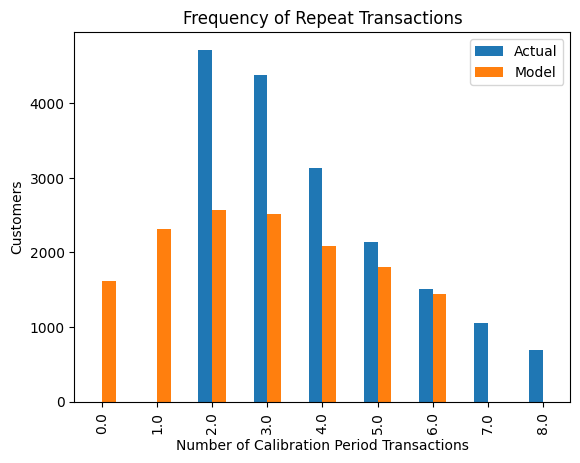

In [56]:
#######################################
# Evaluation of Prediction Results
#######################################

plot_period_transactions(bgf)
plt.show()

In [57]:
# 2. Fit the Gamma-Gamma model. Predict the average value that customers will leave
# and add it to the CLTV DataFrame as `exp_average_value`.

##############################################################
# 2. BUILDING THE GAMMA-GAMMA MODEL
##############################################################

ggf = GammaGammaFitter(penalizer_coef=0.01)

ggf.fit(cltv_df['frequency'], cltv_df['monetary_cltv_avg'])

cltv_df["exp_average_value"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                cltv_df['monetary_cltv_avg'])

cltv_df.head()


,customer_id,recency,tenure,frequency,monetary,monetary_cltv_avg,recency_cltv_weekly,tenure_weekly,exp_sales_3_month,exp_sales_6_month,exp_average_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,119,214,5.0,939.37,187.874000,17.000000,30.571429,0.973927,1.947853,193.632679
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,1469,1574,21.0,2013.55,95.883333,209.857143,224.857143,0.983161,1.966323,96.665048
2,69b69676-1a40-11ea-941b-000d3a38a36f,366,552,5.0,585.32,117.064000,52.285714,78.857143,0.670586,1.341172,120.967619
3,1854e56c-491f-11eb-806e-000d3a38a36f,11,146,2.0,121.97,60.985000,1.571429,20.857143,0.700412,1.400824,67.320145
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,582,668,2.0,209.98,104.990000,83.142857,95.428571,0.396039,0.792077,114.325108


In [58]:
cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                             cltv_df['monetary_cltv_avg'])
cltv_df.sort_values("expected_average_profit", ascending=False).head(10)


,customer_id,recency,tenure,frequency,monetary,monetary_cltv_avg,recency_cltv_weekly,tenure_weekly,exp_sales_3_month,exp_sales_6_month,exp_average_value,expected_average_profit
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,20,55,4.0,5607.20,1401.800000,2.857143,7.857143,1.094385,2.188769,1449.060468,1449.060468
17323,f59053e2-a503-11e9-a2fc-000d3a38a36f,362,707,7.0,7745.27,1106.467143,51.714286,101.000000,0.722238,1.444476,1127.611525,1127.611525
15516,9083981a-f59e-11e9-841e-000d3a38a36f,445,587,4.0,4361.44,1090.360000,63.571429,83.857143,0.574648,1.149296,1127.354466,1127.354466
6402,851de3b4-8f0c-11eb-8cb8-000d3a38a36f,58,66,2.0,1725.38,862.690000,8.285714,9.428571,0.793924,1.587847,923.679965,923.679965
16410,6fecd6c8-261a-11ea-8e1c-000d3a38a36f,399,664,2.0,1719.16,859.580000,57.000000,94.857143,0.397362,0.794724,920.357946,920.357946
1853,f02473b0-43c3-11eb-806e-000d3a38a36f,121,162,2.0,1671.75,835.875000,17.285714,23.142857,0.684292,1.368584,895.036900,895.036900
7936,ae4ce104-dbd4-11ea-8757-000d3a38a36f,26,294,3.0,2533.04,844.346667,3.714286,42.000000,0.676644,1.353288,883.288041,883.288041
9738,3a27b334-dff4-11ea-acaa-000d3a38a36f,280,288,3.0,2511.17,837.056667,40.000000,41.142857,0.681588,1.363175,875.674081,875.674081
12828,0c24fc44-2ac8-11ea-9d27-000d3a38a36f,476,590,2.0,1558.53,779.265000,68.000000,84.285714,0.423541,0.847082,834.567613,834.567613
2291,26ac1432-1dd3-11ea-8bf2-000d3a38a36f,390,684,3.0,2341.67,780.556667,55.714286,97.714286,0.459843,0.919687,816.663279,816.663279


In [60]:
# 3. Calculate the 6-month CLTV and add it to the DataFrame as `cltv_6_months`.

cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency_cltv_weekly'],
                                   cltv_df['tenure_weekly'],
                                   cltv_df['monetary_cltv_avg'],
                                   time = 6,  # 6 aylık
                                   freq = "W",  # T'nin frekans bilgisi.
                                   discount_rate=0.01)

cltv_df['cltv_6_months'] = cltv
cltv_df.head()

,customer_id,recency,tenure,frequency,monetary,monetary_cltv_avg,recency_cltv_weekly,tenure_weekly,exp_sales_3_month,exp_sales_6_month,exp_average_value,expected_average_profit,cltv_6_months
0,cc294636-19f0-11eb-8d74-000d3a38a36f,119,214,5.0,939.37,187.874000,17.000000,30.571429,0.973927,1.947853,193.632679,193.632679,395.733234
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,1469,1574,21.0,2013.55,95.883333,209.857143,224.857143,0.983161,1.966323,96.665048,96.665048,199.430693
2,69b69676-1a40-11ea-941b-000d3a38a36f,366,552,5.0,585.32,117.064000,52.285714,78.857143,0.670586,1.341172,120.967619,120.967619,170.224184
3,1854e56c-491f-11eb-806e-000d3a38a36f,11,146,2.0,121.97,60.985000,1.571429,20.857143,0.700412,1.400824,67.320145,67.320145,98.945526
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,582,668,2.0,209.98,104.990000,83.142857,95.428571,0.396039,0.792077,114.325108,114.325108,95.011659


In [61]:
# a. Observe the top 20 customers with the highest 'cltv_6_months' values.

cltv_df.sort_values(by = 'cltv_6_months', ascending = False).head(20)

,customer_id,recency,tenure,frequency,monetary,monetary_cltv_avg,recency_cltv_weekly,tenure_weekly,exp_sales_3_month,exp_sales_6_month,exp_average_value,expected_average_profit,cltv_6_months
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,20,55,4.0,5607.20,1401.800000,2.857143,7.857143,1.094385,2.188769,1449.060468,1449.060468,3327.777040
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,43,92,11.0,8338.94,758.085455,6.142857,13.142857,1.970108,3.940216,767.360602,767.360602,3172.394390
17323,f59053e2-a503-11e9-a2fc-000d3a38a36f,362,707,7.0,7745.27,1106.467143,51.714286,101.000000,0.722238,1.444476,1127.611525,1127.611525,1708.982063
12438,625f40a2-5bd2-11ea-98b0-000d3a38a36f,520,522,16.0,8029.98,501.873750,74.285714,74.571429,1.565309,3.130618,506.166665,506.166665,1662.613492
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,439,471,52.0,8643.68,166.224615,62.714286,67.285714,4.656138,9.312276,166.712253,166.712253,1628.887381
8868,9ce6e520-89b0-11ea-a6e7-000d3a38a36f,24,241,8.0,4809.81,601.226250,3.428571,34.428571,1.265456,2.530912,611.492616,611.492616,1623.812684
6402,851de3b4-8f0c-11eb-8cb8-000d3a38a36f,58,66,2.0,1725.38,862.690000,8.285714,9.428571,0.793924,1.587847,923.679965,923.679965,1538.855906
6666,53fe00d4-7b7a-11eb-960b-000d3a38a36f,68,91,17.0,4417.71,259.865294,9.714286,13.000000,2.780689,5.561378,262.072907,262.072907,1529.227995
19538,55d54d9e-8ac7-11ea-8ec0-000d3a38a36f,368,411,31.0,7084.43,228.530000,52.571429,58.714286,3.083779,6.167558,229.606946,229.606946,1485.819156
14858,031b2954-6d28-11eb-99c4-000d3a38a36f,104,109,3.0,2230.76,743.586667,14.857143,15.571429,0.871564,1.743128,778.050370,778.050370,1422.999674


# **TASK 4: Creating Segments Based on CLTV**
* 1. Divide all customers into 4 groups (segments) based on their 6-month CLTV and add the group names to the dataset. Add this as `cltv_segment` to the DataFrame.
* 2. Provide brief 6-month action recommendations to the management for 2 of the 4 groups you select.



In [62]:
# 1. Divide all customers into 4 groups (segments) based on their 6-month CLTV
# and add the group names to the dataset.
# Add this to the DataFrame as `cltv_segment`.

cltv_df["cltv_6_months_segment"] = pd.qcut(cltv_df['cltv_6_months'], 4, labels = ['D', 'C', 'B', 'A'])

cltv_df.head()

,customer_id,recency,tenure,frequency,monetary,monetary_cltv_avg,recency_cltv_weekly,tenure_weekly,exp_sales_3_month,exp_sales_6_month,exp_average_value,expected_average_profit,cltv_6_months,cltv_6_months_segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,119,214,5.0,939.37,187.874000,17.000000,30.571429,0.973927,1.947853,193.632679,193.632679,395.733234,A
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,1469,1574,21.0,2013.55,95.883333,209.857143,224.857143,0.983161,1.966323,96.665048,96.665048,199.430693,B
2,69b69676-1a40-11ea-941b-000d3a38a36f,366,552,5.0,585.32,117.064000,52.285714,78.857143,0.670586,1.341172,120.967619,120.967619,170.224184,B
3,1854e56c-491f-11eb-806e-000d3a38a36f,11,146,2.0,121.97,60.985000,1.571429,20.857143,0.700412,1.400824,67.320145,67.320145,98.945526,D
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,582,668,2.0,209.98,104.990000,83.142857,95.428571,0.396039,0.792077,114.325108,114.325108,95.011659,D


# **BONUS: Functionize the Entire Process**


In [67]:
def create_cltv_df(dataframe, month_bgf, month_ggf):
    # Preparing data
    dataframe.dropna(inplace=True)
    # supress the outliers
    cols = ["order_num_total_ever_online", "order_num_total_ever_offline", "customer_value_total_ever_offline","customer_value_total_ever_online"]
    for col in cols:
      replace_with_thresholds(dataframe, col)
      print("for ",col, ", outliers are surpassed\n")
    # creating variables for number of total order and number of total ever
    dataframe["num_of_total_order"] = dataframe["order_num_total_ever_offline"] + dataframe["order_num_total_ever_online"]
    dataframe["num_of_total_ever"] = dataframe["customer_value_total_ever_offline"] + dataframe["customer_value_total_ever_online"]
    # converting date objects into datatime type
    date_col = dataframe.columns[dataframe.columns.str.contains("date")]
    dataframe[date_col] = dataframe[date_col].apply(pd.to_datetime)
    # analysis date
    analysis_date = dataframe["last_order_date"].max() + pd.DateOffset(days=2)

    # creating customer lifetime value (cltv) dataframe
    cltv_df = pd.DataFrame()
    cltv_df['customer_id'] = dataframe['master_id']
    cltv_df['recency'] = (dataframe['last_order_date'] - dataframe['first_order_date']).dt.days
    cltv_df['tenure'] = (analysis_date - dataframe['first_order_date']).dt.days
    cltv_df['frequency'] = dataframe['num_of_total_order']
    cltv_df['monetary'] = dataframe['num_of_total_ever']

    # weekly tenure, recency and average monetary
    cltv_df["monetary_cltv_avg"] = cltv_df["monetary"] / cltv_df["frequency"]
    cltv_df["recency_cltv_weekly"] = cltv_df["recency"] / 7
    cltv_df["tenure_weekly"] = cltv_df["tenure"] / 7
    cltv_df = cltv_df[(cltv_df['frequency'] > 1)]
    # BG/NBD model
    bgf = BetaGeoFitter(penalizer_coef=0.001)

    bgf.fit(cltv_df['frequency'],
            cltv_df['recency_cltv_weekly'],
            cltv_df['tenure_weekly'])
    # expected sales given month with BG/NBD
    col_name = f"exp_sales_{month_bgf}_month"
    cltv_df[col_name] = bgf.predict(4 * month_bgf,
                                          cltv_df['frequency'],
                                          cltv_df['recency_cltv_weekly'],
                                           cltv_df['tenure_weekly'])
    # evaluating the prediction
    plot_period_transactions(bgf)
    plt.show()

    # Gamma-Gamma model
    ggf = GammaGammaFitter(penalizer_coef=0.01)
    ggf.fit(cltv_df['frequency'], cltv_df['monetary_cltv_avg'])
    cltv_df["exp_average_value"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                cltv_df['monetary_cltv_avg'])
    # expected sales given month with gamma-gamma
    cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency_cltv_weekly'],
                                   cltv_df['tenure_weekly'],
                                   cltv_df['monetary_cltv_avg'],
                                   time = month_ggf,  # 6 aylık
                                   freq = "W",  # T'nin frekans bilgisi.
                                   discount_rate=0.01)
    col_name2 = f"cltv_{month_ggf}_months"
    cltv_df[col_name2] = cltv

    # creating cltv segment
    col_name3 = f"cltv_{month_ggf}_months_segment"
    cltv_df["cltv_6_months_segment"] = pd.qcut(cltv_df[col_name2], 4, labels = ['D', 'C', 'B', 'A'])

    return cltv_df



In [68]:
df_for_func = df_
df_for_func.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


for  order_num_total_ever_online , outliers are surpassed

for  order_num_total_ever_offline , outliers are surpassed

for  customer_value_total_ever_offline , outliers are surpassed

for  customer_value_total_ever_online , outliers are surpassed



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


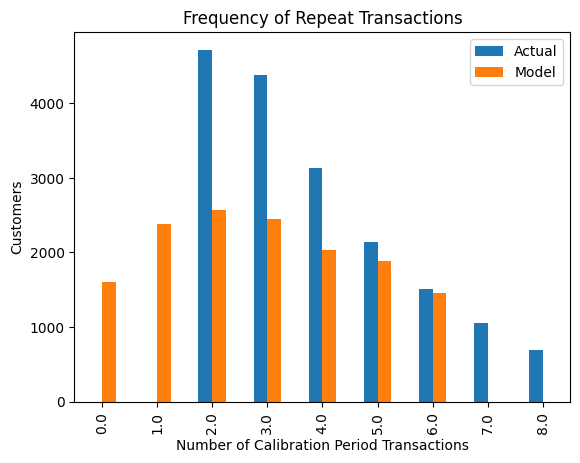

,customer_id,recency,tenure,frequency,monetary,monetary_cltv_avg,recency_cltv_weekly,tenure_weekly,exp_sales_3_month,exp_average_value,cltv_6_months,cltv_6_months_segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,119,214,5.0,939.37,187.874000,17.000000,30.571429,0.973927,193.632679,395.733234,A
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,1469,1574,21.0,2013.55,95.883333,209.857143,224.857143,0.983161,96.665048,199.430693,B
2,69b69676-1a40-11ea-941b-000d3a38a36f,366,552,5.0,585.32,117.064000,52.285714,78.857143,0.670586,120.967619,170.224184,B
3,1854e56c-491f-11eb-806e-000d3a38a36f,11,146,2.0,121.97,60.985000,1.571429,20.857143,0.700412,67.320145,98.945526,D
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,582,668,2.0,209.98,104.990000,83.142857,95.428571,0.396039,114.325108,95.011659,D
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,846,926,3.0,200.86,66.953333,120.857143,132.285714,0.383581,71.348148,57.429857,D
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,228,454,4.0,375.93,93.982500,32.571429,64.857143,0.652066,98.133357,134.278408,C
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,89,382,2.0,163.63,81.815000,12.714286,54.571429,0.519800,89.570194,97.700631,D
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,409,495,5.0,1054.69,210.938000,58.428571,70.714286,0.707761,217.300903,322.734727,A
9,1143f032-440d-11ea-8b43-000d3a38a36f,432,672,2.0,165.96,82.980000,61.714286,96.000000,0.394724,90.814616,75.222409,D


In [69]:
cltv_df1 = create_cltv_df(df_for_func, 3, 6)

cltv_df1.head(10)

In [71]:
cltv_df1.to_csv("cltv_prediction1.csv")

In [72]:
cltv_df.to_csv("cltv_prediction.csv")

In [73]:
!ls

cltv_prediction1.csv  FLO_CLTV_Prediction.ipynb      FLO_CLTV_Prediction.py
cltv_prediction.csv   FLO_CLTV_Prediction_Proje.pdf  flo_data_20k.csv
